# 1. Data Cleaning & Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import spacy
import gensim
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
cleaned_df = pd.read_csv('./drive/My Drive/BT4222_NLP/hotel.csv')
cleaned_df=cleaned_df.drop(columns=['Unnamed: 0'])
cleaned_df.head(2)

,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Reviewer_Score,Tags,lat,lng,cleaned_pos,cleaned_neg,cleaned_combine
0,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",52.360576,4.915968,park hotel beautiful,angry make post available possible site use pl...,park hotel beautiful angry make post available...
1,7.7,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",52.360576,4.915968,real complaint hotel great great location surr...,NaN,real complaint hotel great great location surr...


In [3]:
df = pd.read_csv('./drive/My Drive/BT4222_NLP/Hotel_Reviews.csv')
df.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


In [0]:
cleaned_df.shape

(515212, 12)

## 2. Exploratory Data Analysis

### 2.1 Location of Hotels

In [0]:
address=df['Hotel_Address'].unique().tolist()
tokenized_address=[]
location=[]
for i in range(len(address)):
  tokenized_address.append(list(address[i].split(' ')))
  location.append(tokenized_address[i][-1])

location=list(dict.fromkeys(location))
location= ['United Kingdom' if x =='Kingdom' else x for x in location]
print(location)

['Netherlands', 'United Kingdom', 'France', 'Spain', 'Italy', 'Austria']


In [0]:
# get addresses of hotels with missing lat and lng values
null_df = df[df.isnull().any(axis=1)]

# get missing lat and lng values from addresses using https://www.latlong.net/
missing_lat = {'20 Rue De La Ga t 14th arr 75014 Paris France': 48.831928,
               '23 Rue Damr mont 18th arr 75018 Paris France': 48.887711,
               '4 rue de la P pini re 8th arr 75008 Paris France': 48.897881,
               'Bail n 4 6 Eixample 08010 Barcelona Spain': 41.326160,
               'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria': 48.224480,
               'Hasenauerstra e 12 19 D bling 1190 Vienna Austria': 48.253330,
               'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria': 48.222309,
               'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria': 48.254639,
               'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria': 48.217190,
               'Paragonstra e 1 11 Simmering 1110 Vienna Austria': 48.163448,
               'Pau Clar s 122 Eixample 08009 Barcelona Spain': 41.392761,
               'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria': 48.210091,
               'Sep lveda 180 Eixample 08011 Barcelona Spain': 41.384811,
               'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria': 48.252640,
               'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria': 48.224590,
               'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria': 48.222309,
               'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria': 48.220299}

missing_lng = {'20 Rue De La Ga t 14th arr 75014 Paris France': 2.335140,
               '23 Rue Damr mont 18th arr 75018 Paris France': 2.341540,
               '4 rue de la P pini re 8th arr 75008 Paris France': 2.323460,
               'Bail n 4 6 Eixample 08010 Barcelona Spain': 2.143110,
               'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria': 16.354000,
               'Hasenauerstra e 12 19 D bling 1190 Vienna Austria': 16.339180,
               'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria': 16.351561,
               'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria': 16.442841,
               'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria': 16.388350,
               'Paragonstra e 1 11 Simmering 1110 Vienna Austria': 16.472561,
               'Pau Clar s 122 Eixample 08009 Barcelona Spain': 2.167240,
               'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria': 16.287680,
               'Sep lveda 180 Eixample 08011 Barcelona Spain': 2.161800,
               'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria': 16.338369,
               'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria': 16.384640,
               'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria': 16.351561,
               'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria': 16.355850}

In [0]:
# fill missing lat and lng values
df['lat'] = df['lat'].fillna(df['Hotel_Address'].apply(lambda x: missing_lat.get(x)))
df['lng'] = df['lng'].fillna(df['Hotel_Address'].apply(lambda x: missing_lng.get(x)))
df.isnull().any()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
days_since_review                             False
lat                                           False
lng                                           False
dtype: bool

In [0]:
import folium 
#looking at the famous 20 hotels location in the map. Famous Hotels are calculated based on the total
#no of reviews the Hotel has.
#famous_hotels = reviews.sort_values(by = "total",ascending=False).head(100)
pd.set_option('display.max_colwidth', 2000)
#popular = famous_hotels["HoteL_Name"].values[:20]
hotel_location =df[["Hotel_Name","Hotel_Address",'Average_Score','lat','lng']].drop_duplicates()
maps_osm = folium.Map(location=[47, 6], zoom_start=5, tiles = 'Stamen Toner' )
hotel_location.apply(lambda row:folium.Marker(location=[row["lat"], row["lng"]])
                                             .add_to(maps_osm), axis=1)

maps_osm

### 2.2 Distribution of Hotel Average Scores

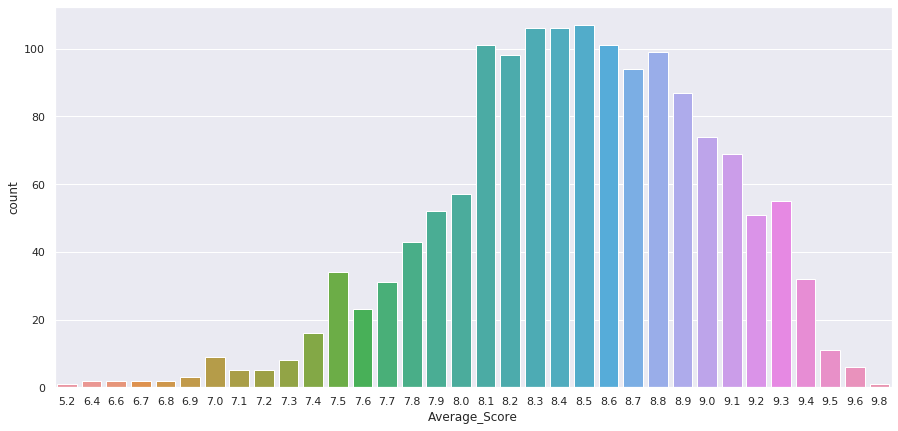

In [0]:
avg_scores_plot = cleaned_df[['Hotel_Name', 'Average_Score']].drop_duplicates()
sns.set(font_scale=1)
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax, x='Average_Score', data=avg_scores_plot)

### 2.3 Word Cloud for Positive Reviews

In [0]:
cleaned_df['cleaned_pos'] = cleaned_df['cleaned_pos'].apply(lambda x: str(x))
all(isinstance(item, str) for item in list(cleaned_df['cleaned_pos']))

True

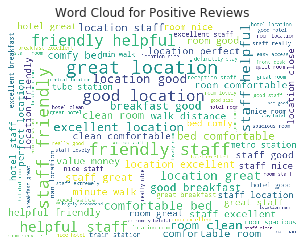

In [0]:
pos_text = ''
for review in cleaned_df['cleaned_pos']:
  for token in review.split():
    pos_text = ' '.join([pos_text, token])

pos_wordcloud = WordCloud(width=800, height=600, background_color='white', max_font_size=50, min_font_size=10, max_words=100).generate(pos_text)
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

### 2.4 Word Cloud for Negative Reviews

In [5]:
cleaned_df['cleaned_neg'] = cleaned_df['cleaned_neg'].apply(lambda x: str(x))
all(isinstance(item, str) for item in list(cleaned_df['cleaned_neg']))

True

In [0]:
neg_text = ''
for review in cleaned_df['cleaned_neg']:
  for token in review:
    neg_text = ' '.join([neg_text, token])

neg_wordcloud = WordCloud(width=800, height=600, background_color='white', max_font_size=50, min_font_size=10, max_words=100).generate(neg_text)
plt.imshow(neg_wordcloud)
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

### 2.5 Top 10 Most Popular Hotels

In [0]:
cleaned_df["pos_count"] = 1
cleaned_df["neg_count"] = 1
cleaned_df["pos_count"] = cleaned_df.apply(lambda x: 0 if x["Positive_Review"] == 'No Positive' else x["pos_count"],axis =1)
cleaned_df["neg_count"] = cleaned_df.apply(lambda x: 0 if x["Negative_Review"] == 'No Negative' else x["neg_count"],axis =1)
reviews = pd.DataFrame(cleaned_df.groupby(["Hotel_Name"])["pos_count","neg_count"].sum())
reviews["total"] = reviews["pos_count"] + reviews["neg_count"]
cleaned_df["count"] = 1
count_review = cleaned_df.groupby("Hotel_Name",as_index=False)["count"].sum()
reviews = pd.merge(reviews,count_review,on = "Hotel_Name",how = "left")
for i in reviews.sort_values(by = "count",ascending=False)["Hotel_Name"].head(10).values:
    print(i)

Britannia International Hotel Canary Wharf
Strand Palace Hotel
Park Plaza Westminster Bridge London
Copthorne Tara Hotel London Kensington
DoubleTree by Hilton Hotel London Tower of London
Grand Royale London Hyde Park
Holiday Inn London Kensington
Hilton London Metropole
Millennium Gloucester Hotel London
Intercontinental London The O2


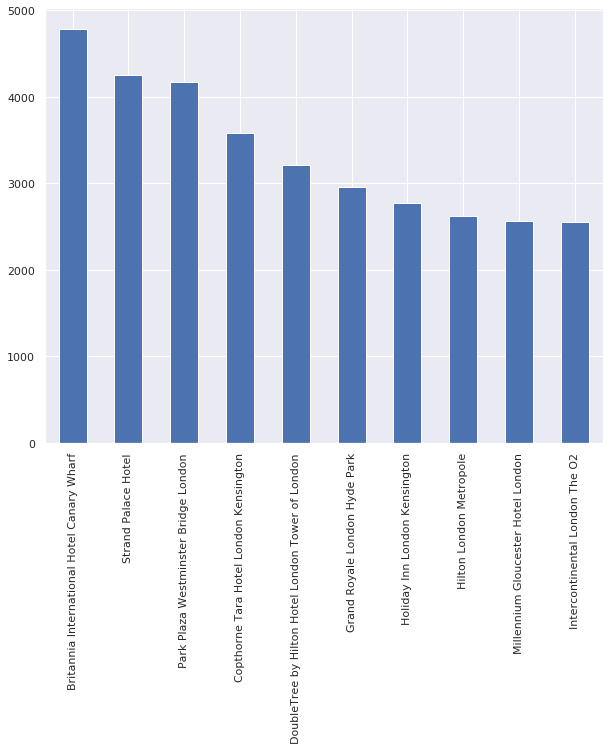

In [0]:
Hotel_Name_count = cleaned_df.Hotel_Name.value_counts()
Hotel_Name_count[:10].plot(kind='bar',figsize=(10,8))

### 2.6 Top 10 Positively-Rated Hotels

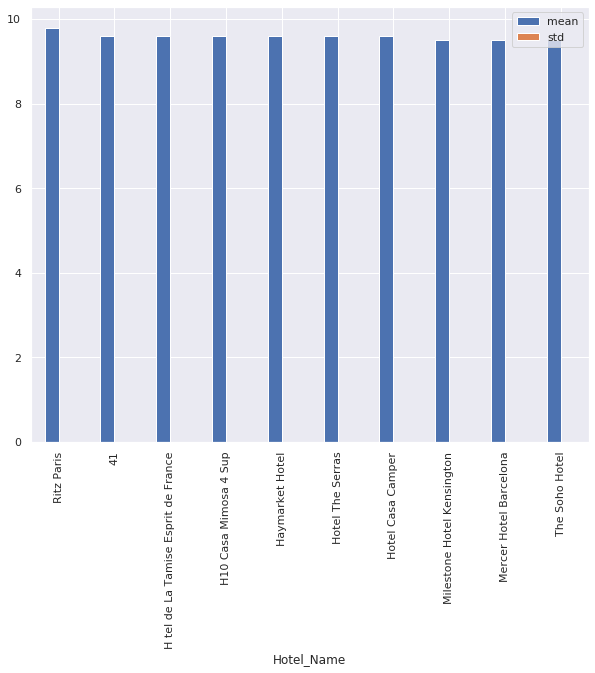

In [0]:
rating_hotels = cleaned_df.groupby("Hotel_Name", as_index=False)["Average_Score"].agg([np.mean, np.std]).sort_values("mean",ascending=False)
rating_hotels[:10].plot(kind='bar',figsize=(10,8))

### 2.7 Top 10 Negatively-Rated Hotels

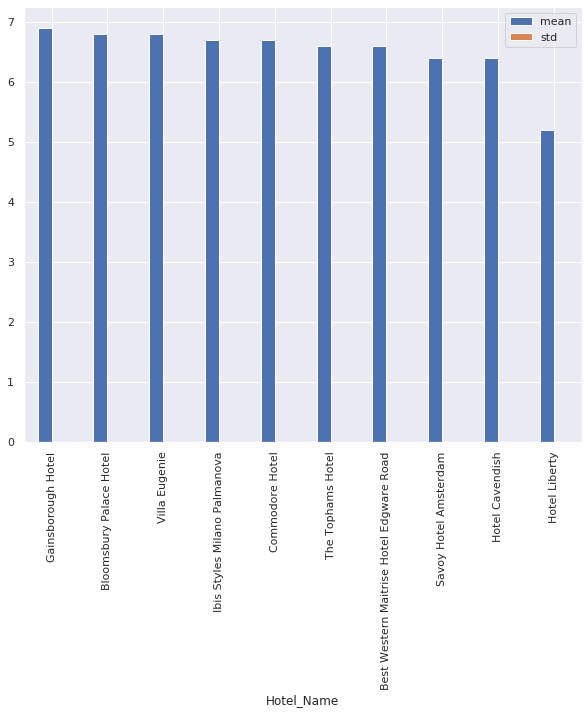

In [0]:
rating_hotels.tail(10).plot(kind='bar',figsize=(10,8))

In [1]:
## hello this is just a separation